### Text Classification

In [1]:
# Loading the data set

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

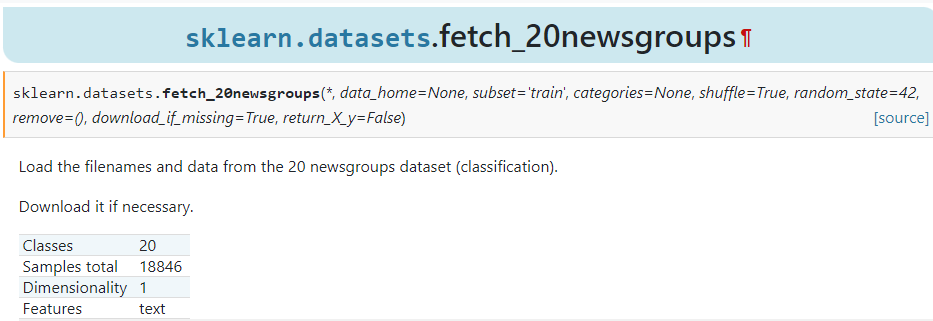

In [2]:
twenty_train.target_names                                 #prints all the categories
# print("\n".join(twenty_train.data[0].split("\n")[:3]))    #prints first line of the first data file

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# prints first line of the first data file

twenty_train.target_names[10]

'rec.sport.hockey'

In [5]:
# Extracting features from text files.
# Text files are actually series of words (ordered). In order to run machine learning algorithms,we need to convert the text
# files into numerical feature vectors.

# Briefly, we segment each text file into words (for English splitting by space), and count # of times each word occurs 
# in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a 
# feature 

from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts
count_vect = CountVectorizer()

# So doing ‘count_vect.fit_transform(twenty_train.data)’, we are learning the vocabulary dictionary and it 
# returns a Document-Term matrix. [n_samples, n_features].
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

# The last line will output the dimension of the Document-Term matrix - [n_samples, n_features]

(11314, 130107)

In [6]:
# TF: Just counting the number of words in each document has 1 issue: it will give more weightage to longer 
# documents than shorter documents. To avoid this, we can use frequency (TF - Term Frequencies) 
# i.e. #count(word) / #Total words, in each document.

# TF-IDF: Finally, we can even reduce the weightage of more common words like (the, is, an etc.) which occurs in all document. 
# This is called as TF-IDF i.e Term Frequency times inverse document frequency.

from sklearn.feature_extraction.text import TfidfTransformer #Transform a count matrix to a normalized tf (term frequency) 
                                                             #or tf-idf (term-frequency times inverse document-frequency) 
                                                             #representation
                                                             
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) # X_train_tfidf will be used in the model in the next section
X_train_tfidf.shape

(11314, 130107)

In [7]:
# Running ML algorithms wehn all the preprocessing is finished

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

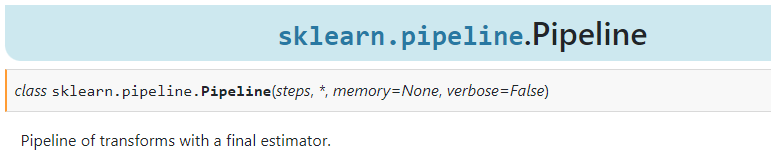

In [20]:
from sklearn.pipeline import Pipeline # cell 5, 6, 7
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [21]:
# Prediction

import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.7738980350504514

In [22]:
from sklearn.linear_model import SGDClassifier 
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)),])
_ = text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

0.8240839086563994

In [15]:
from sklearn.model_selection import GridSearchCV # N-Gram range basically lets you decide the length of the sequence of 
                                                   # consecutive words in the given text.
# N-gram Range = (1, 3)

# Text = “ an apple a day keeps the doctor away”

# Then after applying n-gram, the result would be,

# ['an', 'apple', ‘a’, 'day', 'keeps', 'the', 'doctor', 'away', 'an apple', ‘apple a’, 'a day', 'day keeps', 'keeps the' ,
# 'the doctor' , 'doctor away' , 'an apple a' , 'apple a day’, ‘a day keeps’ , day keeps the ' , 'keeps the doctor', 
# 'the doctor away']


parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),}

In [16]:
# Grid Search

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [17]:
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

In [18]:
gs_clf.best_score_

0.9157684864695698